In [2]:
import os
# COMMON LIBRARIES
from datetime import datetime

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.data import DatasetCatalog, MetadataCatalog
# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
# EVALUATION
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode
# VISUALIZATION
from detectron2.utils.visualizer import Visualizer

#from google.colab.patches import cv2_imshow

# TRAINING

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="WE1IzumYGoc2pjeOHe5g")
project = rf.workspace("het-m73ej").project("bilgi-university-car-damage")
dataset = project.version(1).download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
dataset.name

'Bilgi University Car Damage'

In [5]:
dataset.location

'/Users/het/PycharmProjects/pythodeneme/Bilgi-University-Car-Damage-1'

In [6]:

DATA_SET_NAME = 'Bilgi University Car Damage'
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
dataset_location = '/Users/het/PycharmProjects/finalProject/Bilgi-University-Car-Damage-1'

# TRAIN SET
# import os
# 

TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset_location, "train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(dataset_location, "train", ANNOTATIONS_FILE_NAME)
# 
register_coco_instances(
    name=TRAIN_DATA_SET_NAME,
    metadata={},
    json_file=TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root=TRAIN_DATA_SET_IMAGES_DIR_PATH
)
# HYPERPARAMETERS
ARCHITECTURE = "mask_rcnn_X_101_32x8d_FPN_3x" #mask_rcnn_X_101_32x8d_FPN_3x
CONFIG_FILE_PATH = f"COCO-InstanceSegmentation/{ARCHITECTURE}.yaml"
MAX_ITER = 4500
EVAL_PERIOD = 350
BASE_LR = 0.0001
NUM_CLASSES = 9

metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [7]:
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.DATASETS.TRAIN = (TRAIN_DATA_SET_NAME,)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES

cfg.MODEL.WEIGHTS = "model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4
predictor = DefaultPredictor(cfg)

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)


Predicted Class Names: ['gocuk', 'gocuk', 'gocuk', 'gocuk', 'gocuk', 'far_hasar', 'gocuk', 'kirik-kayip']
Class: gocuk, Price: 1350
Class: gocuk, Price: 1350
Class: gocuk, Price: 1350
Class: gocuk, Price: 1350
Class: gocuk, Price: 1350
Class: far_hasar, Price: 27000
Class: gocuk, Price: 1350
Class: kirik-kayip, Price: 13750
Total Price: 48850


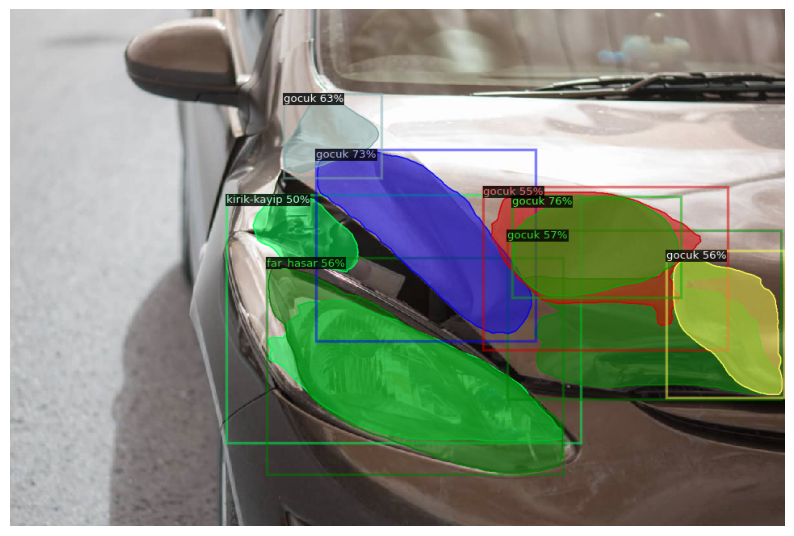

In [8]:
from matplotlib import pyplot as plt
from PIL import Image

import cv2
# Load an image from a file
image_path = "/Users/het/PycharmProjects/finalProject/1.jpg"
img = cv2.imread(image_path)

# Make a prediction using the model
outputs = predictor(img)
instances = outputs["instances"].to("cpu")
# Visualize the prediction
visualizer = Visualizer(
    img[:,:,::-1],
    metadata=metadata,
    scale=0.8,
    instance_mode=ColorMode.IMAGE
)
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
#labels = instances.pred_classes.numpy()

# Sınıflarınız
classes = ['car', 'airbag', 'astar', 'cam_catlagi', 'cizik', 'far_hasar', 'gocuk', 'kaput_hasar', 'kirik-kayip']

# Her bir sınıfa bir fiyat atayalım
prices = [100, 8500, 800, 1000, 1200, 27000, 1350, 40000, 13750]  # Örnek fiyatlar

# Sınıf isimlerini ve fiyatları bir sözlükte birleştirelim
class_price_dict = dict(zip(classes, prices))

# Modelinizin çıktısı
labels = instances.pred_classes.numpy()

# Modelinizin çıktısını sınıf isimlerine dönüştürme
class_names = [classes[i] for i in labels]

print("Predicted Class Names:", class_names)
# Tahmin edilen her bir sınıfın fiyatını ayrı ayrı yazdırma
for class_name in class_names:
    print(f"Class: {class_name}, Price: {class_price_dict[class_name]}")

# Tahmin edilen sınıfların toplam fiyatını hesaplama
total_price = sum(class_price_dict[class_name] for class_name in class_names)

print("Total Price:", total_price)



#print("Predicted Labels:", labels)

img = out.get_image()[:,:,::-1]
img = Image.fromarray(img)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img)

In [9]:
metadata.get("thing_classes")
labels = instances.pred_classes.numpy()

Predicted Class Names: ['kirik-kayip', 'kirik-kayip', 'cizik', 'cizik', 'kirik-kayip', 'kirik-kayip']
Class: kirik-kayip, Price: 13750
Class: kirik-kayip, Price: 13750
Class: cizik, Price: 1200
Class: cizik, Price: 1200
Class: kirik-kayip, Price: 13750
Class: kirik-kayip, Price: 13750
Total Price: 57400


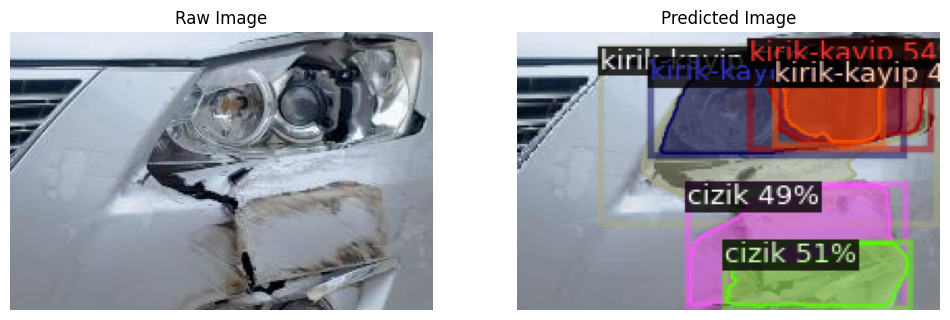

In [24]:
from matplotlib import pyplot as plt
from PIL import Image

import cv2

# Load an image from a file
image_path = "/Users/het/PycharmProjects/pythodeneme/qwertyu1.jpg"
img = cv2.imread(image_path)

# Make a prediction using the model
outputs = predictor(img)
instances = outputs["instances"].to("cpu")

# Visualize the prediction
visualizer = Visualizer(
    img[:, :, ::-1],
    metadata=metadata,
    scale=0.8,
    instance_mode=ColorMode.IMAGE
)
out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
# Sınıflarınız
classes = ['car', 'airbag', 'astar', 'cam_catlagi', 'cizik', 'far_hasar', 'gocuk', 'kaput_hasar', 'kirik-kayip']

# Her bir sınıfa bir fiyat atayalım
prices = [100, 8500, 800, 1000, 1200, 27000, 1350, 40000, 13750]  # Örnek fiyatlar

# Sınıf isimlerini ve fiyatları bir sözlükte birleştirelim
class_price_dict = dict(zip(classes, prices))

# Modelinizin çıktısı
labels = instances.pred_classes.numpy()

# Modelinizin çıktısını sınıf isimlerine dönüştürme
class_names = [classes[i] for i in labels]

print("Predicted Class Names:", class_names)
# Tahmin edilen her bir sınıfın fiyatını ayrı ayrı yazdırma
for class_name in class_names:
    print(f"Class: {class_name}, Price: {class_price_dict[class_name]}")

# Tahmin edilen sınıfların toplam fiyatını hesaplama
total_price = sum(class_price_dict[class_name] for class_name in class_names)

print("Total Price:", total_price)

# Convert the raw image to a PIL image and convert color from BGR to RGB
raw_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Convert the predicted image to a PIL image and convert color from BGR to RGB
predicted_img = Image.fromarray(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

# Plot the raw and predicted images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(raw_img)
plt.axis('off')
plt.title('Raw Image')
plt.subplot(1, 2, 2)
plt.imshow(predicted_img)
plt.axis('off')
plt.title('Predicted Image')

plt.show()


In [21]:
metadata.get("thing_classes")

['car',
 'airbag',
 'astar',
 'cam_catlagi',
 'cizik',
 'far_hasar',
 'gocuk',
 'kaput_hasar',
 'kirik-kayip']

In [12]:
labels = instances.pred_classes.numpy()

In [13]:
from detectron2.evaluation import DatasetEvaluator
from collections import defaultdict
import numpy as np

from detectron2.structures import Boxes
import torch

# Assuming bboxes_gt and bboxes_pred are your ground truth and predicted bounding boxes respectively
bboxes_gt = Boxes(torch.Tensor(bboxes_gt))
bboxes_pred = outputs["instances"].to("cpu")
IOUs = structures.pairwise_iou(bboxes_gt, bboxes_pred)

class DiceEval(DatasetEvaluator):
    def __init__(self, metadata):
        super().__init__()
        self.classes_ids = metadata.thing_dataset_id_to_contiguous_id.values()
        self.classes_names = metadata.thing_classes
        self.dice_score = defaultdict(list)

    def single_dice_coef(self, y_true, y_pred_bin):
        intersection = np.sum(y_true * y_pred_bin)
        if (np.sum(y_true)==0) and (np.sum(y_pred_bin)==0):
            return 1
        return (2*intersection) / (np.sum(y_true) + np.sum(y_pred_bin))

    # You need to implement other necessary methods like reset(), process(), and evaluate()
# For IOU
print("IOUs: ", IOUs)

# For Dice Score
dice_evaluator = DiceEval(DatasetCatalog.get_metadata("Bilgi University Car Damage"))
dice_score = dice_evaluator.evaluate()
print("Dice Score: ", dice_score)
